In [5]:
import numpy as np
import pytesseract as tcr
import matplotlib.pyplot as plt
import cv2

tcr.pytesseract.tesseract_cmd = r'/opt/homebrew/bin/tesseract'


ModuleNotFoundError: No module named 'numpy'

In [ ]:
from PIL import ImageGrab, Image

In [ ]:
clipboardImage = ImageGrab.grabclipboard()
# print(clipboardImage)

(108, 974, 3)

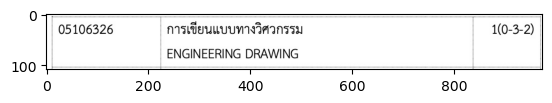

In [ ]:
# clipboardImage.tobitmap()
# clipboardImage.show()
img = np.array(clipboardImage)
# img
plt.imshow(img)
img.shape

In [ ]:
width = img.shape[1]
width

972

In [ ]:
# n = 10
# start = width / 10
# bars = [start * i for i in range(1, n)]
# print(bars)

# ax, fig = plt.subplot()

# # p = plt.plot(bars)
# # p.vlines(bars, 0, 100)
# # plt.show()

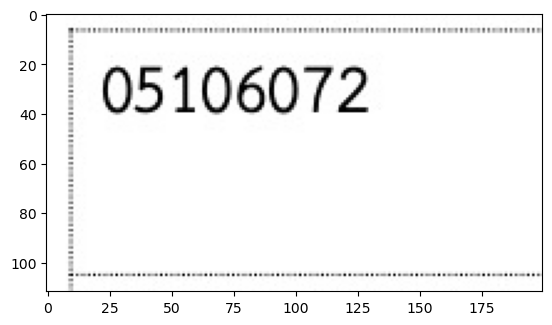

In [ ]:
course_id_img = img[:, :200]
plt.imshow(course_id_img)

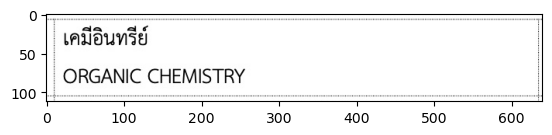

In [ ]:
course_names_img = img[:, 200:840]
plt.imshow(course_names_img)

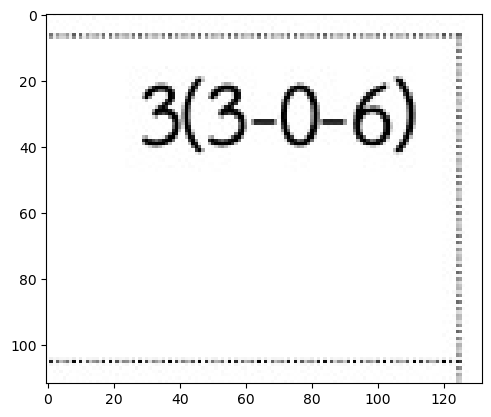

In [ ]:
course_times_img = img[:, 840:]
plt.imshow(course_times_img)

In [ ]:
# custom_config = r'--oem 3 --psm 6'
# tcr.image_to_text(Image.fromarray(course_id_img), custom_config)
id = tcr.image_to_string(course_id_img)[:-1] # cut \n on last char
id

'05106072'

In [ ]:
names = tcr.image_to_string(course_names_img, lang='tha+eng')
names

'เคมีอินทรีย์\nORGANIC CHEMISTRY\n'

In [ ]:
ord('ก'), ord('ฮ')

(3585, 3630)

In [ ]:
# for i in range(ord('ฮ'), ord('ก')):
# for i in range(ord('ก'), ord('ฮ') + 1):
thai_alps = []
for i in range(ord('ก'), 3675 + 1):
    # print(chr(i), end=", ")
    thai_alps += [chr(i)]
    # print(i)
# thai_alps
eng_alps = []
for i in range(ord('A'), ord('z') + 1):
    # print(chr(i), end=",")
    eng_alps += [chr(i)]

In [ ]:
'a' in eng_alps
'O' in eng_alps

True

In [ ]:
'่' in thai_alps # ไม้เอก

True

In [ ]:
def splitThaiAndEng(string):
    T = []
    E = []
    swapToE = False
    prev = 'ø'
    for i in range(len(string)):
        # print(names[i])
        cur = names[i]
    
        if (prev in thai_alps and cur in eng_alps):
            # swap to list E
            swapToE = True
    
        if (swapToE):
            E += [cur]
        else:
            T += [cur]
        # T += []
        if cur in ['\n']:
            continue;
        prev = cur
        # prev = cur
    return T, E

T, E = splitThaiAndEng(names)
print(T)
print(E)

['เ', 'ค', 'ม', 'ี', 'อ', 'ิ', 'น', 'ท', 'ร', 'ี', 'ย', '์', '\n']
['O', 'R', 'G', 'A', 'N', 'I', 'C', ' ', 'C', 'H', 'E', 'M', 'I', 'S', 'T', 'R', 'Y', '\n']


## 3(3-0-6)

In [ ]:
times = tcr.image_to_string(course_times_img)
times = times.replace('|', '').replace('\n', '0').replace(' ', '')
times

'3(3-0-6)0'

In [ ]:
def splitTimes(times):
    i = 0
    credit_str = ''
    interval_str = ''
    while (times[i] != '('):
        # print(times[i])
        credit_str += times[i]
        i += 1
    i += 1 # skip 
    while (times[i] != ')'):
        interval_str += times[i]
        i += 1
    return (credit_str, interval_str)
    # while (i < len(times)):
    #     print(i)
        # i += 1
    
splitTimes(times)

('3', '3-0-6')

In [ ]:
!pip install pyperclip

In [ ]:
!pip install pyautogui

# Bundle


IndexError: string index out of range

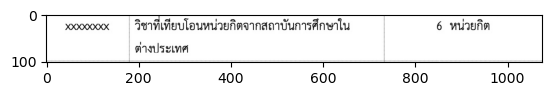

In [ ]:
import numpy as np
import pytesseract as tcr
import matplotlib.pyplot as plt
import cv2
import json
# import pyautogui

# tcr.pytesseract.tesseract_cmd = r'/opt/homebrew/bin/tesseract'
clipboardImage = ImageGrab.grabclipboard()
img = np.array(clipboardImage)
plt.imshow(img)

course_id_img = img[:, :200]
course_names_img = img[:, 200:840]
course_times_img = img[:, 840:]
id = tcr.image_to_string(course_id_img)[:-1] # cut \n on last char
names = tcr.image_to_string(course_names_img, lang='tha+eng')
times = tcr.image_to_string(course_times_img)
times = times.replace('|', '').replace('\n', '0').replace(' ', '')

thai_alps = []
for i in range(ord('ก'), 3675 + 1):
    # print(chr(i), end=", ")
    thai_alps += [chr(i)]

eng_alps = []
for i in range(ord('A'), ord('z') + 1):
    # print(chr(i), end=",")
    eng_alps += [chr(i)]

def splitThaiAndEng(string):
    T = []
    E = []
    swapToE = False
    prev = 'ø'
    for i in range(len(string)):
        # print(names[i])
        cur = string[i]
    
        if (prev in thai_alps and cur in eng_alps):
            # swap to list E
            swapToE = True
    
        if (swapToE):
            E += [cur]
        else:
            T += [cur]
        # T += []
        if cur in ['\n']:
            continue;
        prev = cur
        # prev = cur

    # cut \n
    # T = T[:-1]
    # E = E[:-1]


    # return T, E
    return "".join(T).replace("\n", ' ')[:-1], "".join(E).replace('\n', ' ')[:-1]

T, E = splitThaiAndEng(names)
# print(T)
# print(E)

def splitTimes(times):
    i = 0
    credit_str = ''
    interval_str = ''
    while (times[i] != '('):
        # print(times[i])
        credit_str += times[i]
        i += 1
    i += 1
    while (times[i] != ')'):
        interval_str += times[i]
        i += 1
    return (credit_str, interval_str)
    # while (i < len(times)):
    #     print(i)
        # i += 1
    
credit, interval = splitTimes(times)

# print("id = ", id)
# print("thai name = ", T)
# print("eng name  = ", E)
# print("credit = ", credit)
# print("interval = ", interval)

dic = {
    "name": T,
    "nameEng": E,
    "ID": id,
    "credit": credit,
    "compulsory": 'ไม่มี',
    "hours": interval
}

import pyperclip

json_obj = json.dumps(dic, indent=4, ensure_ascii=False)
# print(json_obj)
pyperclip.copy(json_obj)
# import pyperclip

In [ ]:
times

'3(3-0-6)0'

# Improved Bundle

Enter amount epoch


 1


{
    "name": "การปฏิบัติการฝึกงานต่างประเทศ",
    "nameEng": "OVERSEAS TRAINING",
    "ID": "05106398",
    "credit": "6",
    "hours": "0-45-0"
},


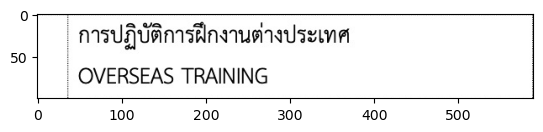

In [ ]:
import numpy as np
import pytesseract as tcr
import matplotlib.pyplot as plt
import cv2
import json
import matplotlib.animation as animation
import pyperclip
# from IPython.display import HTML
# # %matplotlib inline
# from matplotlib import pyplot
# pyplot.rcParams["animation.html"] = "jshtml"




thai_alps = []
for i in range(ord('ก'), 3675 + 1):
    # print(chr(i), end=", ")
    thai_alps += [chr(i)]

eng_alps = []
for i in range(ord('A'), ord('z') + 1):
    # print(chr(i), end=",")
    eng_alps += [chr(i)]


clipboardImage = ImageGrab.grabclipboard()
img = np.array(clipboardImage)
# plt.imshow(img)




def splitThaiAndEng(string):
    T = []
    E = []
    swapToE = False
    prev = 'ø'
    for i in range(len(string)):
        # print(names[i])
        cur = string[i]
        
    
        if (prev in thai_alps and cur in eng_alps):
            # swap to list E
            swapToE = True
    
        if (swapToE):
            E += [cur]
        else:
            T += [cur]
        # T += []
        if cur in ['\n', ' ']:
            continue;
        prev = cur
        # prev = cur
    

    # cut \n
    # T = T[:-1]
    # # E = E[:-1]
    # print(T)
    # print(E)


    # return T, E
    return "".join(T).replace("\n", ' ')[:-1], "".join(E).replace('\n', ' ')[:-1]
    # return "".join(T).replace("\n", ' '), "".join(E).replace('\n', ' ')

# print(T)
# print(E)

def splitTimes(times):
    i = 0
    credit_str = ''
    interval_str = ''
    while (times[i] != '('):
        # print(times[i])
        credit_str += times[i]
        i += 1
    i += 1
    while (times[i] != ')'):
        interval_str += times[i]
        i += 1
    return (credit_str, interval_str)
    # while (i < len(times)):
    #     print(i)
        # i += 1
    

# pyperclip.copy(json_obj)

def getepoch(i, deltaH):
    start_h = i * 100
    end_h = start_h + deltaH
    # print((start_h, end_h))

    a = 150
    b = 740
    course_id_img = img[start_h:end_h, :a]
    course_names_img = img[start_h:end_h, a:b]
    course_times_img = img[start_h:end_h, b:]
    # plt.imshow(course_id_img)
    plt.imshow(course_names_img)
    
    id = tcr.image_to_string(course_id_img)[:-1] # cut \n on last char
    names = tcr.image_to_string(course_names_img, lang='tha+eng')
    times = tcr.image_to_string(course_times_img)
    times = times.replace('|', '').replace('\n', '0').replace(' ', '')
    # print(names)
    T, E = splitThaiAndEng(names)
    credit, interval = splitTimes(times)
    
    # print("id = ", id)
    # print("thai name = ", T)
    # print("eng name  = ", E)
    # print("credit = ", credit)
    # print("interval = ", interval)
    
    dic = {
        "name": T,
        "nameEng": E,
        "ID": id,
        "credit": credit,
        # "compulsory": 'ไม่มี',
        "hours": interval
    }
    

    
    json_obj = json.dumps(dic, indent=4, ensure_ascii=False)
    # print(json_obj)
    return json_obj


all = []
print("Enter amount epoch")
n = int(input())
for i in range(n):
    jdata = getepoch(i, 100)
    print(jdata, end=",\n")
    # all += [jdata + ",\n"]
# print(all)

In [ ]:
def fun(a:int, b:int):
    return a + b
fun('5', 3)

TypeError: can only concatenate str (not "int") to str

In [ ]:
gun = lambda a, b : a + b

In [ ]:
gun(5, 3)

8